In [389]:
#ANALYZING CLUB ACTIVITY AND PERFORMANCE


In [390]:
#STEP1:Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [391]:
#STEP2:Loading the dataset
AppsClub_events=pd.read_csv('AppsClub_events_data.csv')
#view the dataset:
AppsClub_events.head()
#setting 'SessionID'cloumn as the index:
AppsClub_events=AppsClub_events.set_index('Session ID')
AppsClub_events

,Event Name,Date,Attendees Count,Rating,Speaker,New Attendees,Online/Offline,Duration
Session ID,,,,,,,,
1,Intro to CS,7-Oct-2024,50.0,4.2,Ilyas Nmili,10,Offline,60
2,Intro to CS,14-Oct-2024,52.0,4.5,Hasnae Amarmach,8,Offline,75
3,Intro to CS,21-Oct-2024,49.0,4.0,Hasnae Amarmach,7,Offline,90
4,Intro to CS,28-Oct-2024,51.0,4.3,Hasnae Amarmach,9,Offline,90
5,Intro to CS,4-Nov-2024,50.0,NaN,Hasnae Amarmach,6,Offline,80
6,Intro to CS,11-Nov-2024,50.0,4.0,Hasnae Amarmach,5,Offline,90
7,Intro to CS,18-Nov-2024,51.0,4.3,Hasnae Amarmach,4,Offline,90
8,Intro to CS,25-Nov-2024,50.0,4.1,Hasnae Amarmach,3,Offline,90
9,Intro to CS,2-Dec-2024,50.0,4.2,Ilyas Nmili,2,NaN,90


In [392]:
#STEP3:handling missing values:
#1.checking missing values
AppsClub_events.isna().sum()

Event Name         0
Date               0
Attendees Count    1
Rating             3
Speaker            0
New Attendees      0
Online/Offline     3
Duration           0
dtype: int64

In [393]:
#2.filtering the cols with missing values
cols_missing_val=AppsClub_events.columns[AppsClub_events.isna().sum()>0]
print(cols_missing_val)

Index(['Attendees Count', 'Rating', 'Online/Offline'], dtype='object')


In [394]:
#now let's check if the types are correct:
AppsClub_events.dtypes

Event Name          object
Date                object
Attendees Count    float64
Rating             float64
Speaker             object
New Attendees        int64
Online/Offline      object
Duration             int64
dtype: object

In [395]:
#3.fill missing values
for col in cols_missing_val:
 if AppsClub_events[col].dtype=='float64':
     mean_value=AppsClub_events[col].mean()
     AppsClub_events[col]=AppsClub_events[col].fillna(mean_value.round())
 elif AppsClub_events[col].dtype=='O':
     mode_val=AppsClub_events[col].mode()[0]#choose first one in case they are multiple
     AppsClub_events[col]=AppsClub_events[col].fillna(mode_val)
    
     
    


In [396]:
#let's check again:
AppsClub_events.isna().sum()

Event Name         0
Date               0
Attendees Count    0
Rating             0
Speaker            0
New Attendees      0
Online/Offline     0
Duration           0
dtype: int64

In [397]:
AppsClub_events


,Event Name,Date,Attendees Count,Rating,Speaker,New Attendees,Online/Offline,Duration
Session ID,,,,,,,,
1,Intro to CS,7-Oct-2024,50.0,4.2,Ilyas Nmili,10,Offline,60
2,Intro to CS,14-Oct-2024,52.0,4.5,Hasnae Amarmach,8,Offline,75
3,Intro to CS,21-Oct-2024,49.0,4.0,Hasnae Amarmach,7,Offline,90
4,Intro to CS,28-Oct-2024,51.0,4.3,Hasnae Amarmach,9,Offline,90
5,Intro to CS,4-Nov-2024,50.0,4.0,Hasnae Amarmach,6,Offline,80
6,Intro to CS,11-Nov-2024,50.0,4.0,Hasnae Amarmach,5,Offline,90
7,Intro to CS,18-Nov-2024,51.0,4.3,Hasnae Amarmach,4,Offline,90
8,Intro to CS,25-Nov-2024,50.0,4.1,Hasnae Amarmach,3,Offline,90
9,Intro to CS,2-Dec-2024,50.0,4.2,Ilyas Nmili,2,Offline,90


In [398]:
#STEP4:Event analysis:
#1.group rows by event name and calculate the average of attendees
AppsClub_events.groupby('Event Name')['Attendees Count'].mean().round()

Event Name
AppsChill                      25.0
Biweekly Contest               20.0
CP Bootcamp                    58.0
Conference                    150.0
Cyber Security Foundations     31.0
Intro to CS                    50.0
Intro to Data                  26.0
Java                           20.0
Let's Talk                     80.0
Meet Our Laureat               70.0
PFA-PFE                       100.0
Python Basics                  35.0
Visite Code 212                70.0
Name: Attendees Count, dtype: float64

In [399]:
#3.Calculate the average rating for each event:
AppsClub_events.groupby('Event Name')['Rating'].mean().round()


Event Name
AppsChill                     4.0
Biweekly Contest              4.0
CP Bootcamp                   5.0
Conference                    5.0
Cyber Security Foundations    4.0
Intro to CS                   4.0
Intro to Data                 4.0
Java                          4.0
Let's Talk                    5.0
Meet Our Laureat              5.0
PFA-PFE                       5.0
Python Basics                 4.0
Visite Code 212               4.0
Name: Rating, dtype: float64

In [400]:
#4.average rating for online vs offline events:
AppsClub_events.groupby('Online/Offline')['Rating'].mean().round()

Online/Offline
Offline    4.0
Online     4.0
Name: Rating, dtype: float64

In [401]:
#STEP5:identify the most and least popular event:
#1.rank all events by attendance count:
##Here we can consider two interpretations:
##interpretation 1: an event is considered regardless of the event name but it depends on the date ,the speaker,the duration..
##interpretation 2:an event is considered based on the event name(no duplicate allowed) we group the events by name
#since it does seem more logical to group by event Name to see overall popularity of the event,i will work on the 2nd interpretation
Events=AppsClub_events.groupby('Event Name')[['Attendees Count']].sum()
Events
Ranked_Events=Events.sort_values(by='Attendees Count',ascending=False)

In [402]:
#2.Retrieve the top 5 most attended events:(not considering duplicates)

Ranked_Events.iloc[:5]

,Attendees Count
Event Name,
Intro to CS,552.0
Python Basics,314.0
Cyber Security Foundations,187.0
Conference,150.0
CP Bootcamp,115.0


In [403]:
#3.Retrieve the bottom 5 least attended events:(not considering duplicates )
Ranked_Events.tail()

,Attendees Count
Event Name,
Let's Talk,80.0
Meet Our Laureat,70.0
Visite Code 212,70.0
Java,60.0
AppsChill,25.0


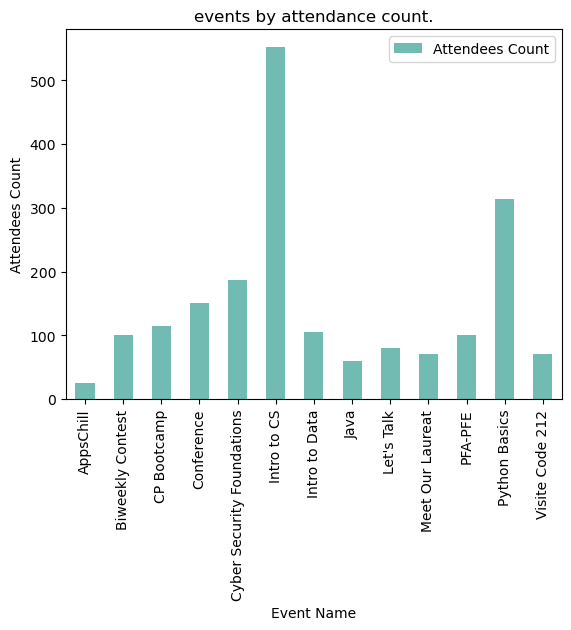

In [404]:
#4.Create a bar chart presenting all events by attendance count.
Events.plot(kind='bar',color='#71BBB2')
plt.ylabel('Attendees Count')
plt.title('events by attendance count.')
plt.show()
#it is pretty clear that the intro to CS event was the most popular by far in terms of attendees count
#it could be due to the date since it was set pretty early on or due  to the speaker .
# However,we cannot conclude anything for sure we still need to perform more analysis on the matter.

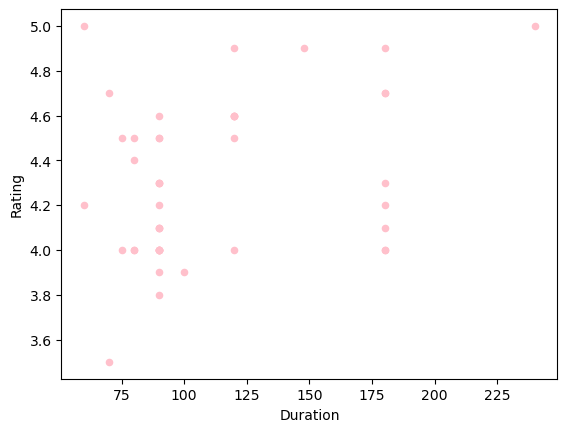

In [405]:
#STEP6:Analyze event duration vs. feedback score:
AppsClub_events.plot(x='Duration',y='Rating',kind='scatter',c='pink')
plt.show()


In [406]:
##Step 7 : Count events organized by each member
#1. Count occurrences of each speaker
Speaker_event=AppsClub_events['Speaker'].value_counts()
Speaker_event

Speaker
Amine Ait Hamma        15
Hasnae Amarmach         9
Ilyas Nmili             8
Broad Sec Cell          6
Nohaila El Idrissi      4
Youssef Taguejgalet     4
Name: count, dtype: int64

In [407]:
#Step 8 : Identify the most active member
max_events=Speaker_event[Speaker_event==Speaker_event.max()]
max_events

Speaker
Amine Ait Hamma    15
Name: count, dtype: int64

In [408]:
#Step 9 : Best-rated organizing member:
rating_speaker=AppsClub_events.groupby('Speaker')['Rating'].mean()
rating_speaker

Speaker
Amine Ait Hamma        4.373333
Broad Sec Cell         4.250000
Hasnae Amarmach        4.144444
Ilyas Nmili            4.437500
Nohaila El Idrissi     3.950000
Youssef Taguejgalet    4.575000
Name: Rating, dtype: float64

In [409]:
rating_speaker[rating_speaker==rating_speaker.max()]#subsetting max

Speaker
Youssef Taguejgalet    4.575
Name: Rating, dtype: float64

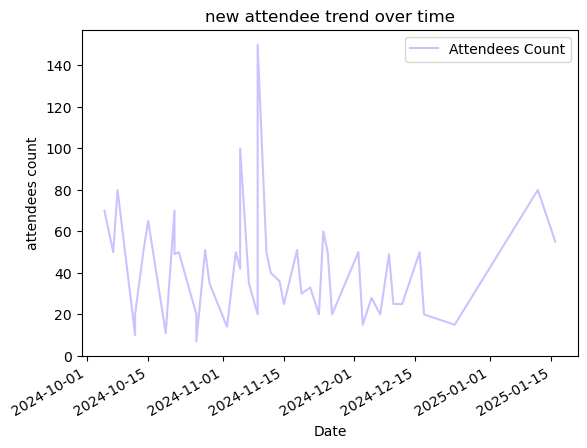

In [410]:
##Step 10 : Visualizing new attendee trend over time
#1.sorting data set by date:
#since the date is in string let's format it:
Date_sort=AppsClub_events.copy()#i don't want to modify my df directly
Date_sort['Date']=pd.to_datetime(Date_sort['Date']) #converting string to time
Date_sort=Date_sort.sort_values(by='Date')#sort
Date_sort.plot(kind='line',y='Attendees Count',x='Date',color='#CDC1FF')
plt.xlabel('Date')
plt.ylabel('attendees count')
plt.title('new attendee trend over time')
plt.show()